In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mall = pd.read_csv(r'C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Unsupervised\Kmeans\mall_kmeans.csv')

In [3]:
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
mall1 = mall.iloc[:, 1::]

In [6]:
mall1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [19]:
mall1.shape

(200, 4)

In [8]:
mall1.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
mall1.Genre.replace({'Female': 0, 'Male': 1}, inplace= True)

In [10]:
mall1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [11]:
from sklearn.cluster import KMeans

In [12]:
mall_k = KMeans(n_clusters= 3)

In [13]:
mall_k.fit(mall1)

KMeans(n_clusters=3)

In [14]:
mall_k.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
cluster_name = list(mall_k.labels_)

In [16]:
mall_k.cluster_centers_

array([[ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52631579, 40.39473684, 87.        , 18.63157895]])

In [18]:
mall_k.score(mall1)

-143391.5923603568

In [20]:
SSD_list = []
for k in range (1, 50):
    mall_k = KMeans(n_clusters= k)
    mall_k.fit(mall1)
    SSD = -1*mall_k.score(mall1)
    SSD_list.append(SSD)

C:\Users\RahulK\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
 k = list(range(1,50))

Text(0.5, 1.0, 'Elbow Plot on Mall_data')

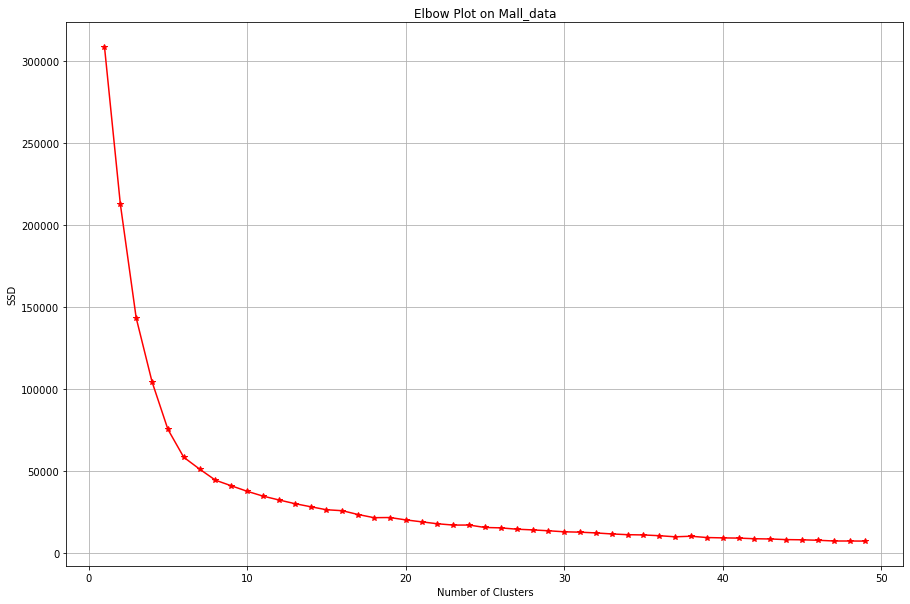

In [23]:
plt.figure(figsize=(15,10))
plt.plot(k, SSD_list, marker = '*', color = 'r')
plt.grid()
plt.xlabel('Number of Clusters')
plt.ylabel('SSD')
plt.title('Elbow Plot on Mall_data')

In [24]:
perc = []
for i in range(0,48):
    p = (SSD_list[i]-SSD_list[i+1])/SSD_list[i]*100
    perc.append(p)

In [25]:
perc

[31.072970744531403,
 32.64504302955142,
 27.182149508600485,
 27.78829683959157,
 22.61146933677555,
 12.369957705814207,
 13.254510849323486,
 7.693702254650249,
 8.202802294197694,
 7.85793913175596,
 6.727628697804104,
 6.952083957759886,
 6.309141517932303,
 6.541097943263624,
 2.2279484304356063,
 9.059290577580596,
 8.219472624620796,
 -0.43822105177124426,
 6.7004203442565355,
 5.854605163528448,
 6.273149885898452,
 4.52420192996283,
 -0.1039334427121885,
 8.717430691471995,
 1.5626298447462055,
 5.265131241745605,
 3.0011369504210323,
 3.807720464726519,
 4.637228037330423,
 1.8196876568184566,
 3.634735984500411,
 5.140941606270068,
 3.831934715559245,
 1.5211457479547694,
 4.228310337520188,
 6.285235918871014,
 -3.4241091415432607,
 7.812820230664919,
 2.2986322091703615,
 1.392579073205862,
 4.3209516469391325,
 1.7685453729689178,
 4.442514353120837,
 1.5542583637397376,
 3.421309712203413,
 5.8234476569485825,
 0.2612450028878281,
 0.6230067172452054]

In [26]:
# We will take k = 5, but 4 is the best choice

In [37]:
mall_k = KMeans(n_clusters= 5)

In [38]:
mall_k.fit(mall1)

KMeans(n_clusters=5)

In [39]:
df_with_label = pd.concat([mall, pd.Series(mall_k.labels_)],axis= 1)

In [40]:
df_with_label

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),0
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


In [41]:
df_with_label.rename(columns= {df_with_label.columns[5] : 'Cluster_Name'}, inplace= True)  

In [42]:
df_with_label.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_Name
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [43]:
df_with_label.Cluster_Name.value_counts()

2    79
0    39
1    36
4    23
3    23
Name: Cluster_Name, dtype: int64

In [44]:
# Lets add the colour coding based on the clusters


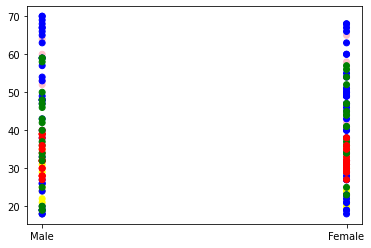

In [47]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink'])
plt.scatter(mall.Genre, mall.Age,  c = colormap[mall_k.labels_])

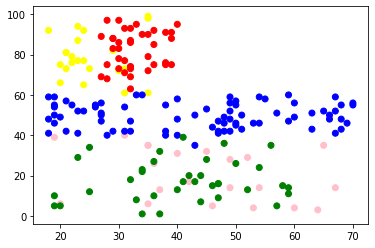

In [51]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink'])
plt.scatter(mall.Age,mall['Spending Score (1-100)'],  c = colormap[mall_k.labels_])

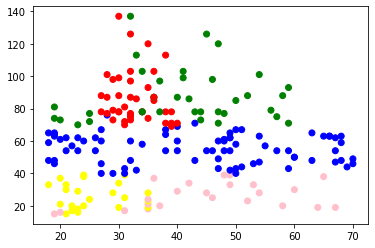

In [52]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink'])
plt.scatter( mall.Age,mall['Annual Income (k$)'] , c = colormap[mall_k.labels_])

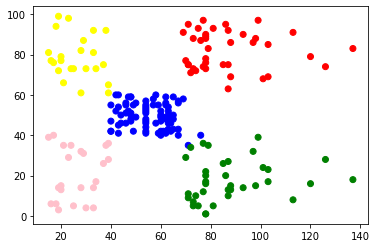

In [53]:
colormap = np.array(['red', 'green', 'blue', 'yellow', 'pink'])
plt.scatter( mall['Annual Income (k$)'], mall['Spending Score (1-100)'] , c = colormap[mall_k.labels_])

In [ ]:
# From the above plot we can say that their is no relation between Annual income and spending score